# 회귀
여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

## 경사하강법

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
# `np.random.rand()` : 균일 분포의 정수 난수 1개 생성, 0~1사이의 값 중에서 모두 같은 확률로 한 값이 선택 된다. 
X = 2 * np.random.rand(100,1)
X
# 결과 0~2 사이값 나옴

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [4]:
y = 6 + 4 * X +  np.random.randn(100,1)

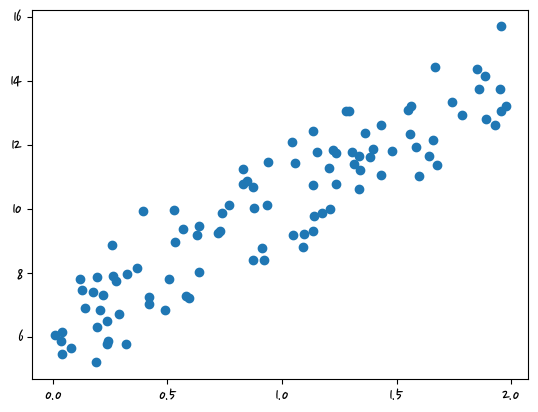

In [5]:
plt.scatter(X,y)

In [6]:
def get_weight_updates(w1,w0,X,y,learnin_rate=0.01):
    N = len(y)
    # w1과 같은걸 만들어서 넣어줘라?
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    # 계산해야되는 만큼? 곱해줘야 돼서 learning_rate 곱함.
    w1_update = -(2/N)*learnin_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learnin_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update

In [7]:
def gradient_descent_steps(X,y,iters=10000):
    # 초기값 0으로 주고
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    # for문 돌려서
    for ind in range(iters):
        # 위에 함수 가져옴
        w1_update,w0_update = get_weight_updates(w1,w0,X,y)
        # 새로운 w1은 기존의 w1에서 빼준다
        # 이렇게 조정한다.
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [8]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [9]:
w1,w0 = gradient_descent_steps(X,y,iters=1000)

In [10]:
print(w1,w0)

[[4.02181364]] [[6.16203122]]


In [11]:
y_pred = w1[0,0]*X+w0
get_cost(y,y_pred)

0.9934784315632568